In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.font_manager as fm
import statsmodels.api as sm

In [2]:
# 파일 경로
file_path = r'C:\Users\Administrator\Desktop\대학\3학년 1학기\빅데이터기초와데이터분석\프로젝트\merged_data.csv'

# Excel 파일 읽기
data = pd.read_csv(file_path, encoding='euc-kr')

# 데이터 출력
data.head() # 데이터의 첫 5줄을 출력

,일시,평균현지기압(hPa),최고현지기압(hPa),최저현지기압(hPa),평균해면기압(hPa),최고해면기압(hPa),최저해면기압(hPa),평균기온(℃),최고기온 평균(℃),최저기온 평균(℃),...,평균상대습도(%),최소상대습도(%),평균풍속(m/s),최대풍속(m/s),합계일조시간(hr),합계전천일사량(MJ/㎡),CPI,평균풍속계급,최대풍속계급,가격
0,2000-01,1025.9,1041.0,1011.2,1027.6,1043.1,1014.0,0.0,4.5,-4.2,...,77,46,2.5,11.5,190.2,311.37,62.456,2,6,1166
1,2000-02,1023.6,1037.5,1011.9,1024.7,1038.9,1015.1,-0.4,5.0,-5.4,...,69,30,2.7,11.7,240.4,414.30,62.647,2,6,1197
2,2000-03,1018.8,1075.2,1000.9,1020.2,1034.1,1004.0,6.2,12.7,0.2,...,72,23,2.7,12.7,250.1,533.61,62.962,2,6,1332
3,2000-04,1013.5,1025.6,998.9,1014.9,1028.0,1002.0,11.5,17.8,5.3,...,71,26,2.7,13.0,253.9,606.17,62.709,2,6,1753
4,2000-05,1010.8,1018.7,997.5,1012.5,1021.8,1000.0,16.8,23.0,11.3,...,82,27,2.2,9.9,251.1,639.46,62.393,2,5,1526


In [3]:
# 전체 데이터 수 확인
data.shape

(292, 21)

# EDA

In [4]:
# 데이터의 기본 통계 정보 확인
data.describe()

,평균현지기압(hPa),최고현지기압(hPa),최저현지기압(hPa),평균해면기압(hPa),최고해면기압(hPa),최저해면기압(hPa),평균기온(℃),최고기온 평균(℃),최저기온 평균(℃),강수량(mm),평균상대습도(%),최소상대습도(%),평균풍속(m/s),최대풍속(m/s),합계일조시간(hr),합계전천일사량(MJ/㎡),CPI,평균풍속계급,최대풍속계급,가격
count,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000
mean,1016.349315,1033.749315,1003.794521,1017.954110,1029.642123,1006.184589,12.872945,18.239726,8.232877,112.341781,83.380137,42.075342,2.114041,9.057534,241.561644,517.142911,87.722558,1.989726,4.914384,2796.167808
std,6.344933,90.268507,6.564586,6.572217,7.830303,6.451671,8.972201,8.783994,9.392262,107.991816,7.397595,12.823725,0.316947,1.294866,40.663190,134.526677,13.852923,0.101012,0.513928,1377.043130
min,1004.800000,1012.100000,986.200000,1006.200000,1013.500000,989.400000,-4.500000,0.600000,-9.500000,4.700000,66.000000,16.000000,1.400000,6.600000,134.400000,249.990000,62.393000,1.000000,4.000000,989.000000
25%,1009.975000,1021.550000,998.550000,1011.900000,1023.075000,1000.975000,4.425000,9.775000,-0.625000,35.475000,77.000000,33.000000,1.900000,8.200000,216.325000,404.527500,75.343500,2.000000,5.000000,1747.500000
50%,1017.500000,1028.400000,1003.400000,1018.900000,1030.650000,1006.050000,13.350000,19.800000,7.750000,69.700000,82.000000,41.000000,2.100000,8.950000,237.500000,527.340000,91.510000,2.000000,5.000000,2631.000000
75%,1022.225000,1033.900000,1009.025000,1023.925000,1036.300000,1011.325000,21.300000,26.300000,17.000000,154.175000,90.000000,49.000000,2.300000,9.700000,261.850000,618.725000,98.758000,2.000000,5.000000,3488.000000
max,1027.700000,2560.000000,1017.400000,1029.200000,1044.500000,1020.300000,27.100000,32.000000,23.700000,620.600000,99.000000,86.000000,2.900000,14.500000,407.600000,956.350000,113.990000,2.000000,7.000000,10740.000000


In [5]:
# 데이터의 null 값 확인
data.isnull().sum()

# 결측치가 없음을 확인함.

일시               0
평균현지기압(hPa)      0
최고현지기압(hPa)      0
최저현지기압(hPa)      0
평균해면기압(hPa)      0
최고해면기압(hPa)      0
최저해면기압(hPa)      0
평균기온(℃)          0
최고기온 평균(℃)       0
최저기온 평균(℃)       0
강수량(mm)          0
평균상대습도(%)        0
최소상대습도(%)        0
평균풍속(m/s)        0
최대풍속(m/s)        0
합계일조시간(hr)       0
합계전천일사량(MJ/㎡)    0
CPI              0
평균풍속계급           0
최대풍속계급           0
가격               0
dtype: int64

### 상관계수 확인

In [6]:
# '일시' 열의 앞뒤 공백 제거
data['일시'] = data['일시'].str.strip()

# '일시' 열을 datetime 형식으로 변환
data['일시'] = pd.to_datetime(data['일시'], format='%Y-%m')

data.head()

,일시,평균현지기압(hPa),최고현지기압(hPa),최저현지기압(hPa),평균해면기압(hPa),최고해면기압(hPa),최저해면기압(hPa),평균기온(℃),최고기온 평균(℃),최저기온 평균(℃),...,평균상대습도(%),최소상대습도(%),평균풍속(m/s),최대풍속(m/s),합계일조시간(hr),합계전천일사량(MJ/㎡),CPI,평균풍속계급,최대풍속계급,가격
0,2000-01-01,1025.9,1041.0,1011.2,1027.6,1043.1,1014.0,0.0,4.5,-4.2,...,77,46,2.5,11.5,190.2,311.37,62.456,2,6,1166
1,2000-02-01,1023.6,1037.5,1011.9,1024.7,1038.9,1015.1,-0.4,5.0,-5.4,...,69,30,2.7,11.7,240.4,414.30,62.647,2,6,1197
2,2000-03-01,1018.8,1075.2,1000.9,1020.2,1034.1,1004.0,6.2,12.7,0.2,...,72,23,2.7,12.7,250.1,533.61,62.962,2,6,1332
3,2000-04-01,1013.5,1025.6,998.9,1014.9,1028.0,1002.0,11.5,17.8,5.3,...,71,26,2.7,13.0,253.9,606.17,62.709,2,6,1753
4,2000-05-01,1010.8,1018.7,997.5,1012.5,1021.8,1000.0,16.8,23.0,11.3,...,82,27,2.2,9.9,251.1,639.46,62.393,2,5,1526


In [7]:
# 한글 나눔 폰트 설치 ##코랩에서 한글 폰트 깨지기 때문에
import matplotlib as mpl  # 기본 설정
import matplotlib.pyplot as plt  # 그래프 그리기
import matplotlib.font_manager as fm  # 폰트 관리


!apt-get update -qq         # apt-get 패키지 설치 명령어, -qq : 에러외 메세지 숨기기
!apt-get install fonts-nanum* -qq #나눔글꼴 설치

fe = fm.FontEntry(fname=r'/usr/share/fonts/truetype/nanum/NanumGothic.ttf', name='NanumGothic') #파일 저장되어있는 경로와 이름 설정
fm.fontManager.ttflist.insert(0, fe)  # Matplotlib에 폰트 추가
plt.rcParams.update({'font.size': 10, 'font.family': 'NanumGothic'}) #폰트설정

'apt-get'��(��) ���� �Ǵ� �ܺ� ����, ������ �� �ִ� ���α׷�, �Ǵ�
��ġ ������ �ƴմϴ�.
'apt-get'��(��) ���� �Ǵ� �ܺ� ����, ������ �� �ִ� ���α׷�, �Ǵ�
��ġ ������ �ƴմϴ�.


c:\Users\Administrator\anaconda3\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()
c:\Users\Administrator\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


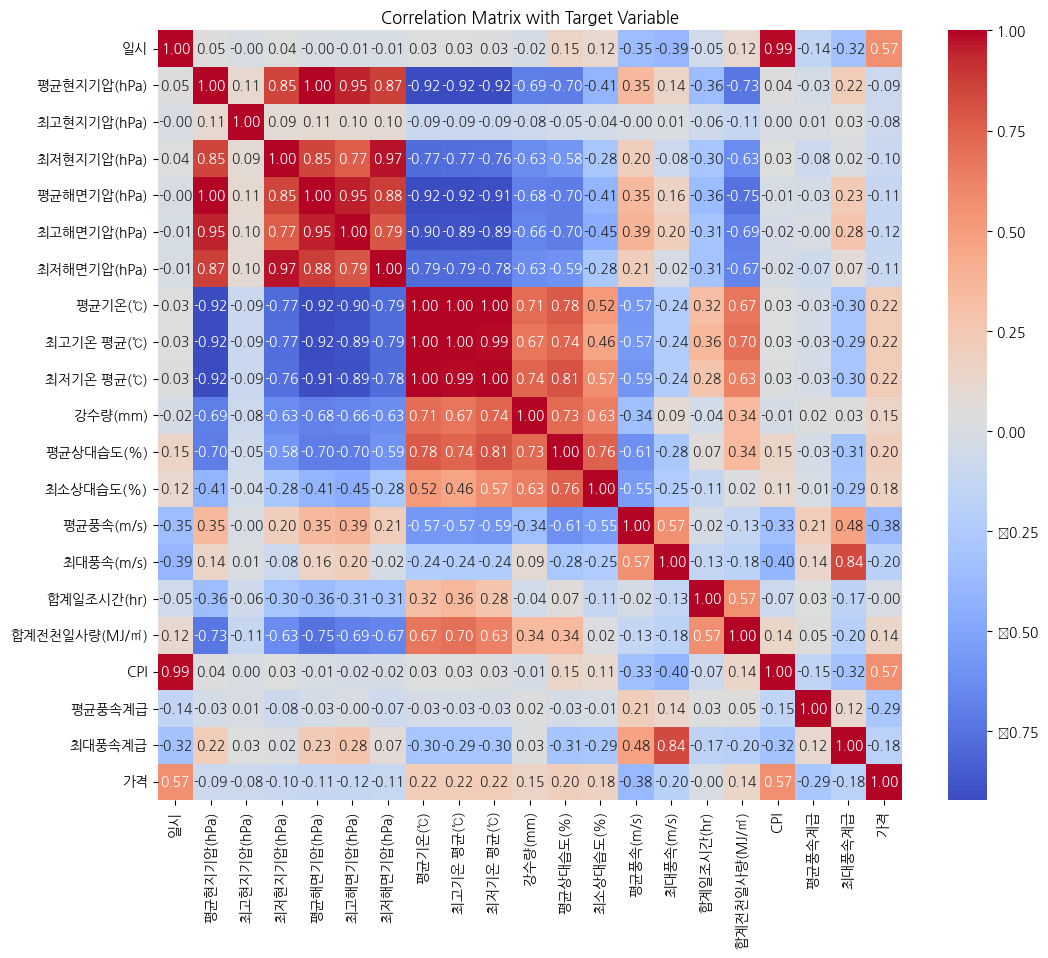

In [8]:
# 변수들간의 상관계수 분석

# 상관관계 행렬 계산
correlation_matrix = data.corr()

# 상관관계 히트맵 시각화 (종속 변수 포함)
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix with Target Variable')
plt.show()

## feature selection (filter method )
* (최고 최저) 기온, 기압, 습도들을 버리고 -> 평균만 사용
* 범주형 변수 사용 ( 프로젝트 조건 )

In [9]:
columns_of_interest = ['평균해면기압(hPa)', '평균기온(℃)','최고기온 평균(℃)' , '강수량(mm)', '평균상대습도(%)', '평균풍속(m/s)', '합계전천일사량(MJ/㎡)', '최대풍속계급', 'CPI','가격']
data = data[columns_of_interest]
data.head()

,평균해면기압(hPa),평균기온(℃),최고기온 평균(℃),강수량(mm),평균상대습도(%),평균풍속(m/s),합계전천일사량(MJ/㎡),최대풍속계급,CPI,가격
0,1027.6,0.0,4.5,40.7,77,2.5,311.37,6,62.456,1166
1,1024.7,-0.4,5.0,5.6,69,2.7,414.30,6,62.647,1197
2,1020.2,6.2,12.7,24.7,72,2.7,533.61,6,62.962,1332
3,1014.9,11.5,17.8,40.1,71,2.7,606.17,6,62.709,1753
4,1012.5,16.8,23.0,61.2,82,2.2,639.46,5,62.393,1526


### 시각화

c:\Users\Administrator\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


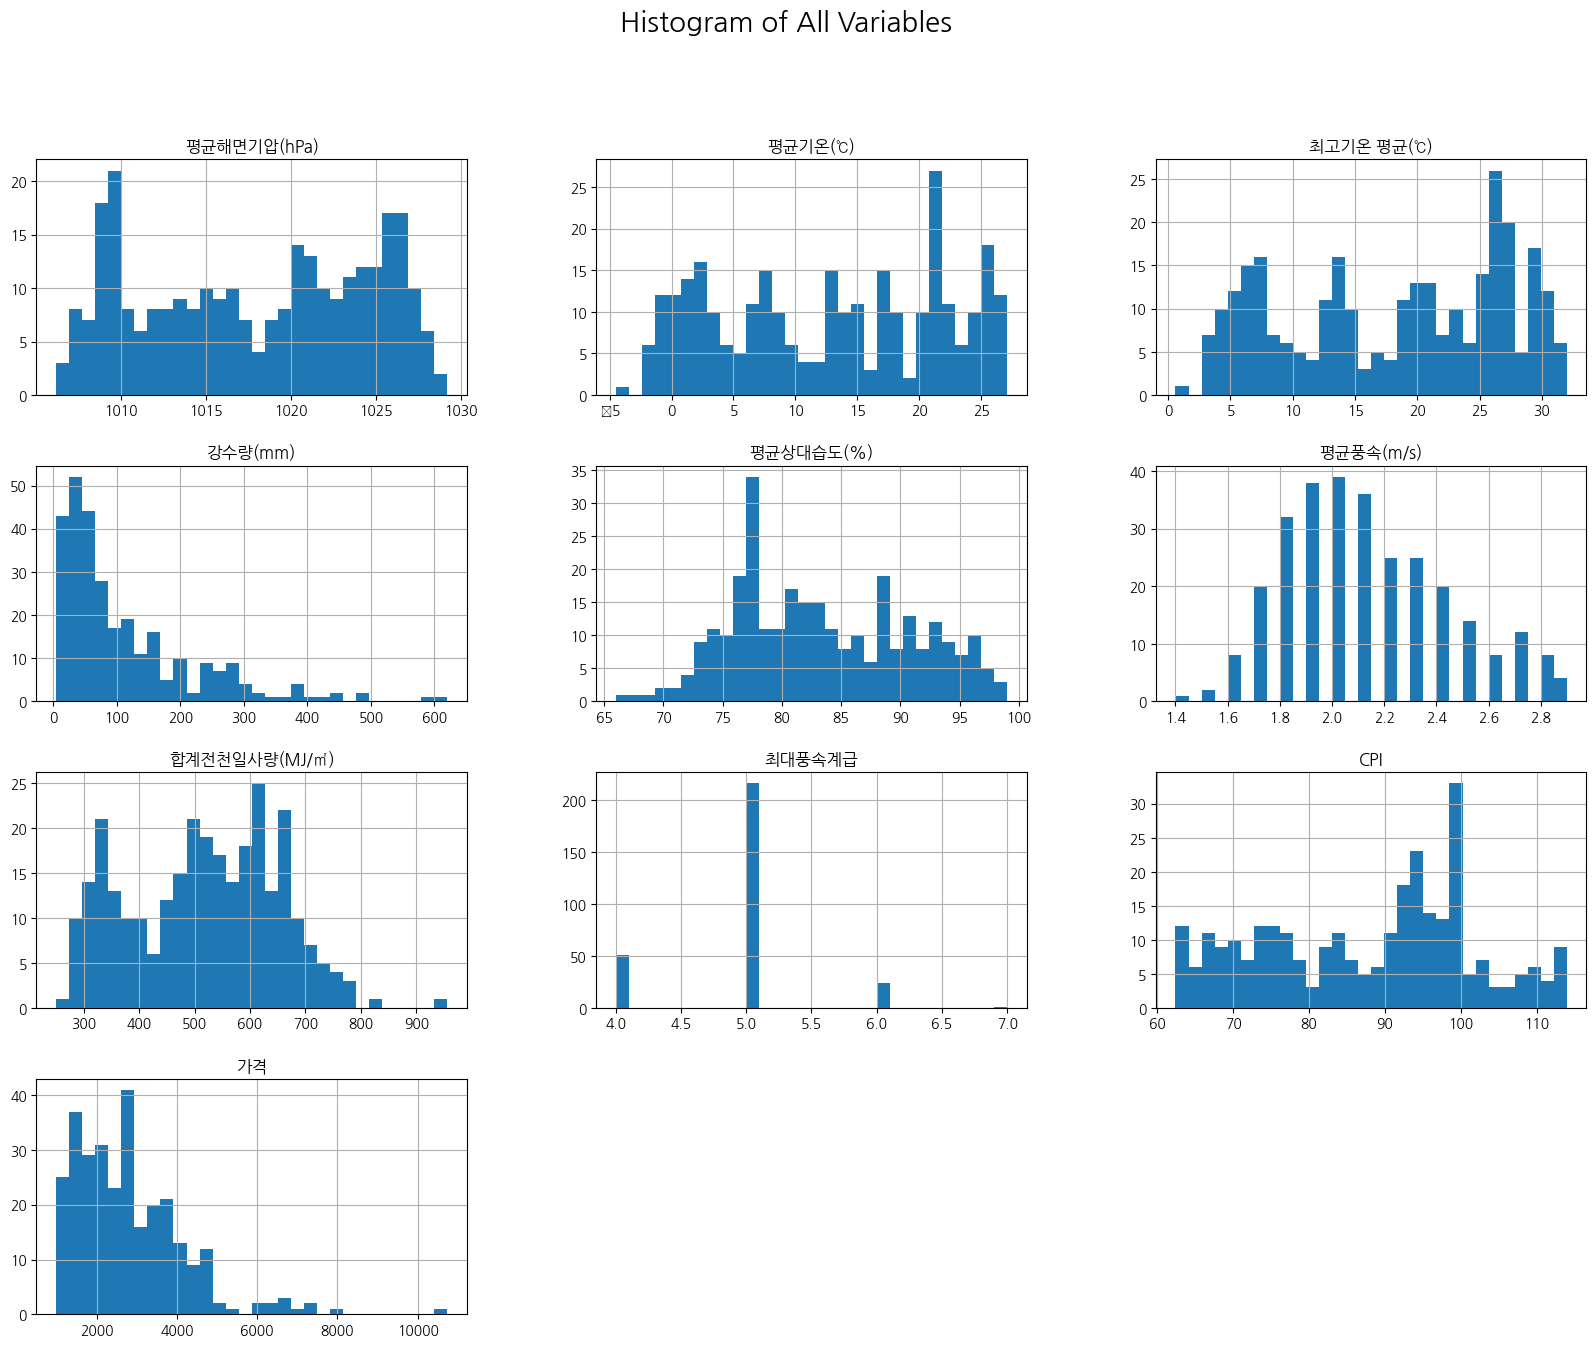

In [10]:
# 히스토그램
data.hist(bins=30, figsize=(20, 15))
plt.suptitle('Histogram of All Variables', fontsize=20)
for ax, col in zip(plt.gcf().axes, data.columns):
    ax.set_title(col)
plt.show()

- 평균해면기압(hPa): 해면기압은 주로 1015에서 1025 hPa 사이에 집중되어 있으며, 이 범위에서 가장 빈도가 높은 것으로 보임.

- 평균기온(℃): 평균기온은 5℃에서 20℃ 사이에 분포하며, 10℃에서 15℃ 사이에서 빈도가 가장 높음

- 강수량(mm): 대부분의 데이터 포인트에서 강수량은 0에 가까우며, 200mm 이상의 강수량을 보인 경우는 상대적으로 드움

- 평균상대습도(%): 상대습도는 70%에서 90% 사이에 넓게 분포하고 있으며, 특히 80% 부근에서 빈도가 높음

- 평균풍속(m/s): 대부분의 평균풍속은 1.6에서 2.4 m/s 사이에 분포하며, 2.0 m/s 부근에서 빈도가 가장 높음

- 합계전천일사량(MJ/㎡): 대부분의 값은 200 MJ/㎡에서 600 MJ/㎡ 사이에 분포하며, 이 범위 내에서 다양한 빈도를 보임.

- 평균풍속계급 - 거의 대분의 데이터가 2.0으로 하나의 값을 가짐. (삭제)

- 최대풍속계급 - 4.0, 5.0, 6.0 의 값으로 분포되어 있고 5.0의 빈도가 가장 높음. 

- 가격 - 가격 데이터는 2000에서 4000 사이에 많이 분포하고 있으며, 특히 3000 주변에서 빈도가 높음.



c:\Users\Administrator\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


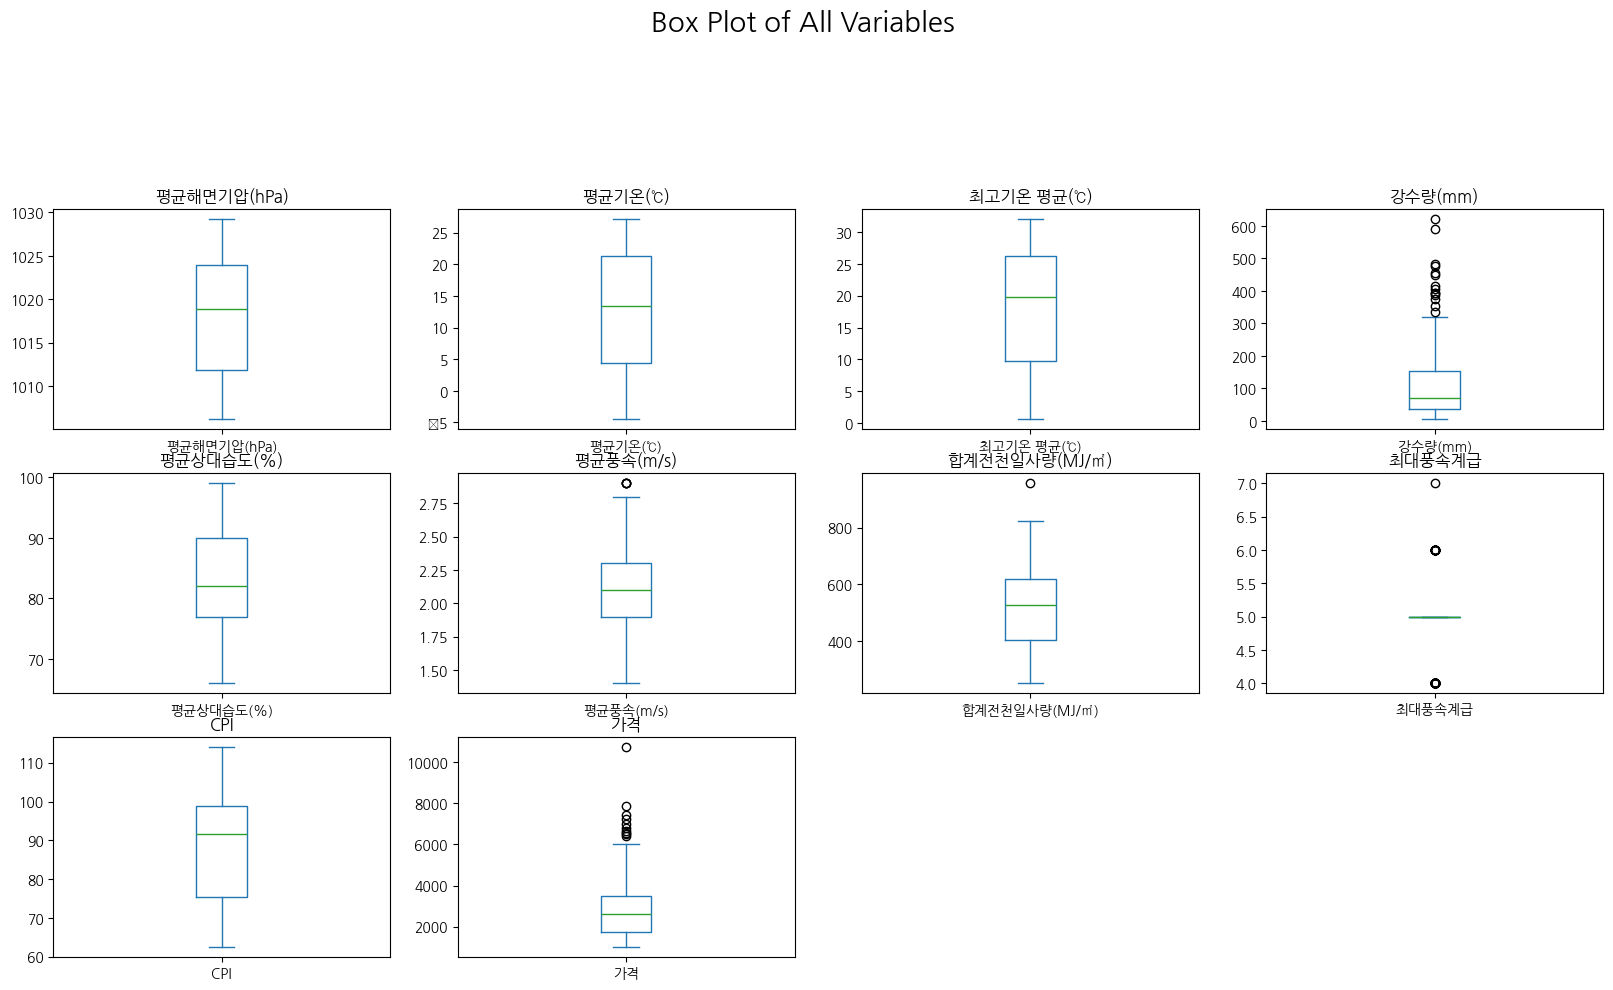

In [11]:
# boxplot
data.plot(kind='box', subplots=True, layout=(6, 4), figsize=(20, 20), sharex=False, sharey=False)
plt.suptitle('Box Plot of All Variables', fontsize=20)
for ax, col in zip(plt.gcf().axes, data.columns):
    ax.set_title(col)
plt.show()

평균해면기압(hPa)
- 대부분의 값이 1010~1025 hPa 사이에 분포.
- 이상치는 없음.

평균기온(℃)
- 0℃에서 25℃ 사이에 값이 분포.
- 이상치는 없음.

강수량(mm)
- 대부분의 값이 0~150mm 사이에 분포.
- 많은 이상치가 150mm 이상에서 관찰됨.

평균상대습도(%)
- 70%에서 90% 사이에 값이 분포.
- 이상치는 없음.

평균풍속(m/s)
- 1.5 m/s에서 2.75 m/s 사이에 값이 분포.
- 소수의 이상치가 2.75 m/s 이상에서 관찰됨.

합계전천일사량(MJ/㎡):
- 250~650 MJ/㎡ 사이에 값이 분포.
- 몇 개의 이상치가 650 MJ/㎡ 이상에서 관찰됨.

최대풍속계급
- 대부분의 값이 4~6 사이에 분포.
- 소수의 이상치가 6 이상에서 관찰됨.

가격
- 가격은 2000원에서 6000원 사이에 값이 분포.
- 여러 개의 이상치가 6000원 이상에서 관찰됨.

### 전처리 방향

강수량과 가격 변수는 이상치가 많이 존재하여 이 부분 처리가 중요할듯 함. 


대부분의 변수들은 큰 범위 내에서 고르게 분포되어 있어 다양한 기상 조건이 고려된 데이터임을 알 수 있음.


평균기온, 평균상대습도, 평균풍속 등의 변수는 비교적 안정적으로 분포되어 있어 기후 조건에 따른 가격 변동 분석에 유용

c:\Users\Administrator\anaconda3\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()
c:\Users\Administrator\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


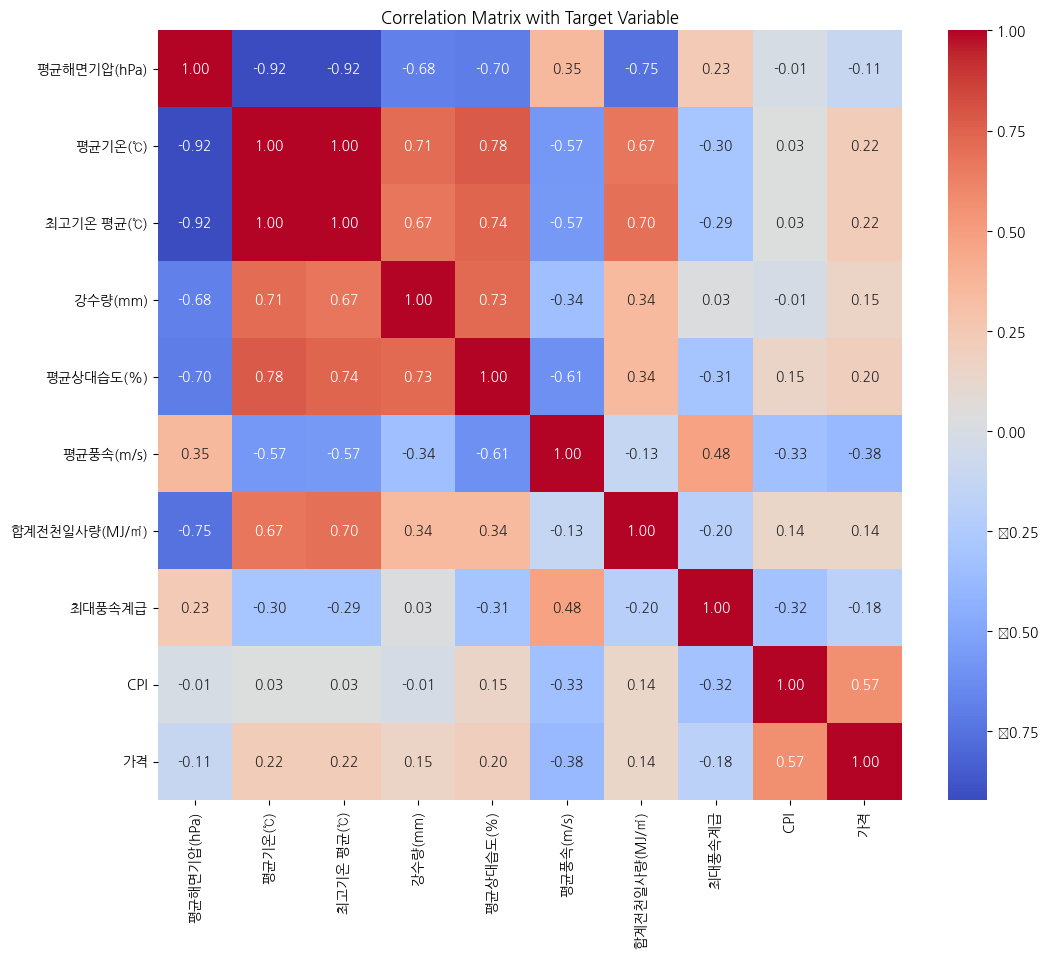

In [13]:
# 상관관계 행렬 계산 (종속 변수 포함)

# 상관관계 행렬 계산 (종속 변수 포함)
correlation_matrix = data.corr()

# 상관관계 히트맵 시각화 (종속 변수 포함)
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix with Target Variable')
plt.show()

### 이상치 처리에 대한 고민



In [12]:
# 강수량

# 이상치 개수 계산 함수
def count_outliers(column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers.shape[0]

# 강수량과 가격의 이상치 개수 출력
rainfall_outliers = count_outliers('강수량(mm)')
price_outliers = count_outliers('가격')

print(f"강수량 데이터의 이상치 수: {rainfall_outliers}")
print(f"가격 데이터의 이상치 수: {price_outliers}")

강수량 데이터의 이상치 수: 14
가격 데이터의 이상치 수: 10


In [14]:
# 남아있는 변수들

# 평균해면기압(hPa)
# 평균기온 
# 최고기온 평균(℃) 
# 강수량(mm)
# 평균상대습도(%)
# 평균풍속(m/s)
# 합계전천일사량(MJ/㎡)
# 최대풍속계급
# CPI
# 가격

# 다중회귀분석

In [15]:
# 독립 변수와 종속 변수 분리
X = data.drop(columns=['가격'])
y = data['가격']

In [16]:
# 상수항 추가
X = sm.add_constant(X)

# 다중회귀분석 모델 적합
model = sm.OLS(y, X).fit()

# 예측값 계산
y_pred = model.predict(X)

# 모델 요약 출력
model_summary = model.summary()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                     가격   R-squared:                       0.420
Model:                            OLS   Adj. R-squared:                  0.401
Method:                 Least Squares   F-statistic:                     22.65
Date:                Thu, 06 Jun 2024   Prob (F-statistic):           7.39e-29
Time:                        04:40:45   Log-Likelihood:                -2444.9
No. Observations:                 292   AIC:                             4910.
Df Residuals:                     282   BIC:                             4947.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -1.018e+05   3.44e+04     -2.957

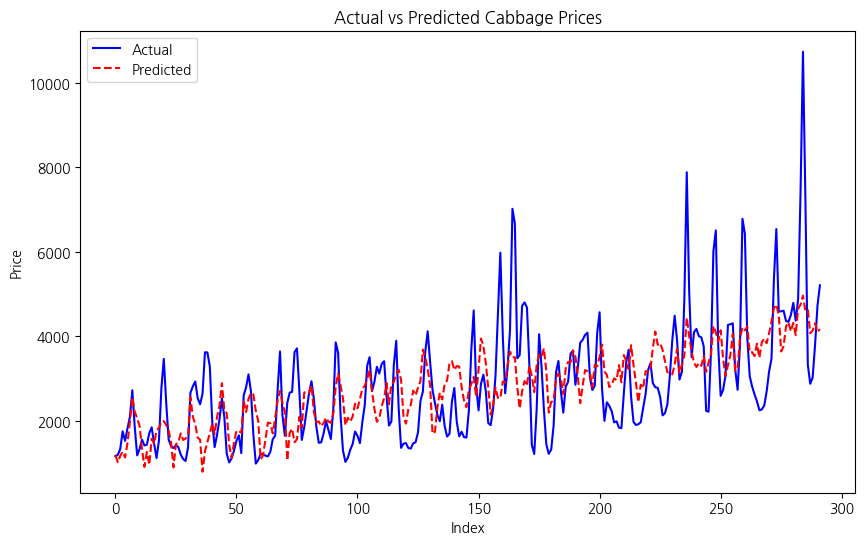

In [17]:
# 실제 데이터와 예측 데이터 비교 플롯
plt.figure(figsize=(10, 6))
plt.plot(y.values, label='Actual', color='blue')
plt.plot(y_pred, label='Predicted', color='red', linestyle='dashed')
plt.xlabel('Index')
plt.ylabel('Price')
plt.title('Actual vs Predicted Cabbage Prices')
plt.legend()
plt.show()

In [18]:
import numpy as np

# MSE 계산 및 출력
mse = mean_squared_error(y, y_pred)
print(f'MSE: {mse}')

# RMSE 계산 및 출력
rmse = np.sqrt(mean_squared_error(y, y_pred))
print(f'RMSE: {rmse}')


MSE: 1096951.013865757
RMSE: 1047.3542924272365


## 결과 해석

### 모델의 유의성 판단 ->  F-statistic와 그에 따른 p-value를 통해 확인
- F-statistic은  9.198이고, 이에 대한 p-value는 2.96e-10로 매우 낮음. 
따라서 이 모델은 통계적으로 유의


### 각 계수의 유의성 ->  t-statistic와 p-value를 통해 계수의 유의성을 평가
- 평균해면기압(hPa): p-value = 0.003 (유의함)

- 평균기온 -  p-value = 0.370 (유의하지 않음)

- 최고기온 평균(℃) -  p-value = 0.832 (유의하지 않음)

- 강수량(mm): p-value = 0.353  (유의하지 않음) 

- 평균상대습도(%) p-value =  0.048 (유의함)

- 평균풍속(m/s) p-value = 0.592  (유의하지 않음)

- 합계전천일사량(MJ/㎡): p-value = 0.671(유의하지 않음)

- 최대풍속계급: p-value = 0.247  (유의하지 않음)

- CPI - p-value =0.000 (유의함)




## 이상치를 제거한 후 모델링 진행

In [19]:
# 이상치 제거 함수
def remove_outliers(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]

# 강수량과 가격 이상치 제거
data_no_outliers = remove_outliers(data, '강수량(mm)')
data_no_outliers = remove_outliers(data_no_outliers, '가격')

In [20]:
# '일시' 열 제거 및 특성과 타겟 변수 정의
X = data_no_outliers.drop(columns=['가격'])
y = data_no_outliers['가격']

# 상수항 추가
X = sm.add_constant(X)

# 예측값 계산
y_pred = model.predict(X)

# 다중회귀분석 모델 적합
model = sm.OLS(y, X).fit()

# 모델 요약 출력
model_summary = model.summary()
print(model_summary)

                            OLS Regression Results                            
Dep. Variable:                     가격   R-squared:                       0.378
Model:                            OLS   Adj. R-squared:                  0.356
Method:                 Least Squares   F-statistic:                     17.43
Date:                Thu, 06 Jun 2024   Prob (F-statistic):           1.88e-22
Time:                        04:40:45   Log-Likelihood:                -2183.4
No. Observations:                 268   AIC:                             4387.
Df Residuals:                     258   BIC:                             4423.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -5.817e+04   2.96e+04     -1.967

###  이상치 결과에 대한 해석 

- 이상치를 제거했을떄 R^2의 값이 내려감을 확인 

-  이상치를 제거하지 않고 모델링을 진행

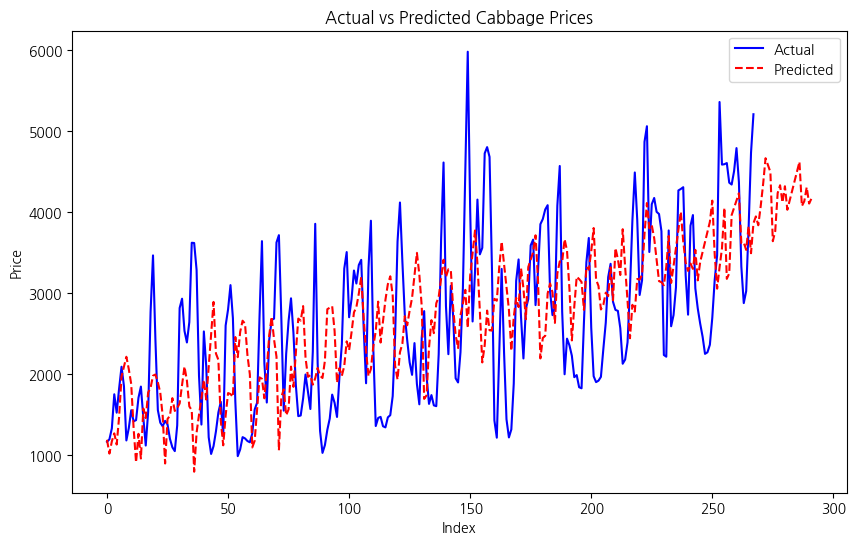

In [21]:
# 실제 데이터와 예측 데이터 비교 플롯
plt.figure(figsize=(10, 6))
plt.plot(y.values, label='Actual', color='blue')
plt.plot(y_pred, label='Predicted', color='red', linestyle='dashed')
plt.xlabel('Index')
plt.ylabel('Price')
plt.title('Actual vs Predicted Cabbage Prices')
plt.legend()
plt.show()

In [22]:
# MSE 계산 및 출력
mse = mean_squared_error(y, y_pred)
print(f'MSE: {mse}')

# RMSE 계산 및 출력
rmse = np.sqrt(mean_squared_error(y, y_pred))
print(f'RMSE: {rmse}')

MSE: 774198.3662686212
RMSE: 879.8854279215113


# sklearn 회귀모델 사용

In [23]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [24]:
data.head()

,평균해면기압(hPa),평균기온(℃),최고기온 평균(℃),강수량(mm),평균상대습도(%),평균풍속(m/s),합계전천일사량(MJ/㎡),최대풍속계급,CPI,가격
0,1027.6,0.0,4.5,40.7,77,2.5,311.37,6,62.456,1166
1,1024.7,-0.4,5.0,5.6,69,2.7,414.30,6,62.647,1197
2,1020.2,6.2,12.7,24.7,72,2.7,533.61,6,62.962,1332
3,1014.9,11.5,17.8,40.1,71,2.7,606.17,6,62.709,1753
4,1012.5,16.8,23.0,61.2,82,2.2,639.46,5,62.393,1526


In [25]:
# 독립 변수와 종속 변수 분리
X = data.drop(columns=['가격'])
y = data['가격']

In [26]:
# 훈련, 검증, 테스트 데이터 분리
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

### ridge regression

In [27]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score

# Ridge Regression 모델과 하이퍼파라미터 그리드 설정
ridge = Ridge()
param_grid = {
    'alpha': [0.1, 1.0, 5, 10, 20, 100]
}

# GridSearchCV 객체 생성
grid_search = GridSearchCV(estimator=ridge, param_grid=param_grid, cv=5)

# 데이터에 그리드 검색을 실행
grid_search.fit(X_train, y_train)

# 최적의 모델 선택
best_model = grid_search.best_estimator_

# 검증 데이터에 대한 예측
y_valid_pred = best_model.predict(X_valid)


In [28]:
# 성능 평가
mse_valid = mean_squared_error(y_valid, y_valid_pred)
r2_valid = r2_score(y_valid, y_valid_pred)
print(f'Validation MSE: {mse_valid}, R2: {r2_valid}')

# 훈련 데이터와 검증 데이터를 합침
X_train_valid = pd.concat([X_train, X_valid])
y_train_valid = pd.concat([y_train, y_valid])

# 최적의 모델로 재학습
best_model.fit(X_train_valid, y_train_valid)

# 테스트 데이터에 대한 평가
y_test_pred = best_model.predict(X_test)
mse_test = mean_squared_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)
print(f'Test MSE: {mse_test}, R2: {r2_test}')

Validation MSE: 2842769.786619839, R2: 0.37150895164565856
Test MSE: 973812.2835984809, R2: 0.2331911980228113


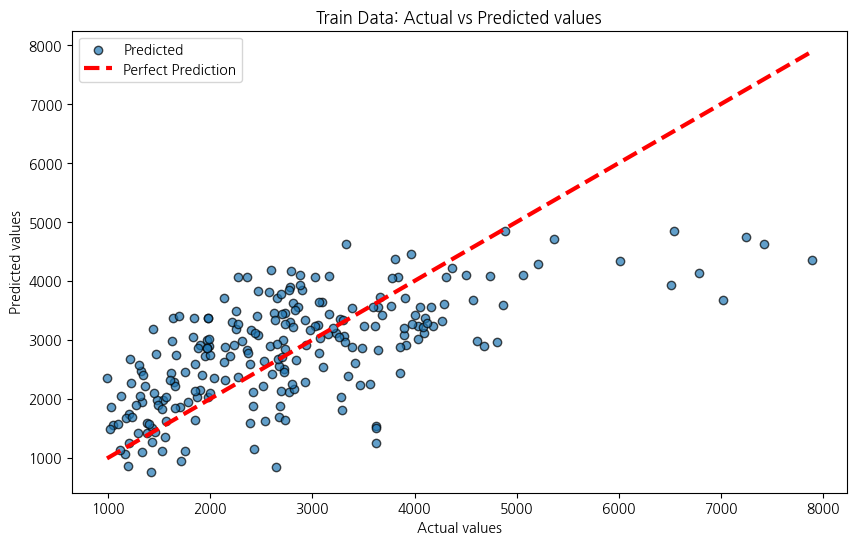

In [29]:
# 훈련 데이터에 대한 예측값 계산
y_train_pred = best_model.predict(X_train)


# 실제 데이터와 예측 데이터 시각화 (훈련 데이터)
plt.figure(figsize=(10, 6))
plt.scatter(y_train, y_train_pred, edgecolors=(0, 0, 0), alpha=0.7, label='Predicted')
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--', lw=3, label='Perfect Prediction')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Train Data: Actual vs Predicted values')
plt.legend()
plt.show()


### RandomForestRegressor

In [30]:
import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

X = data.drop(columns=['가격'])
y = data['가격']

# 데이터 분할 (훈련, 검증, 테스트 세트)
X_train_valid, X_test, y_train_valid, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_valid, y_train_valid, test_size=0.2, random_state=42)


In [31]:
# 랜덤 포레스트 모델 초기화
rf = RandomForestRegressor(random_state=42)

# 훈련 데이터로 모델 학습
rf.fit(X_train, y_train)

# 검증 데이터에 대한 예측
y_valid_pred = rf.predict(X_valid)

# 성능 평가
mse_valid = mean_squared_error(y_valid, y_valid_pred)
r2_valid = r2_score(y_valid, y_valid_pred)
print(f'Validation MSE: {mse_valid}, R2: {r2_valid}')


Validation MSE: 1108045.804468085, R2: 0.4256101664491184


In [32]:
# 훈련 데이터와 검증 데이터를 합침
X_train_valid = pd.concat([X_train, X_valid])
y_train_valid = pd.concat([y_train, y_valid])

# 최적의 모델로 재학습
rf.fit(X_train_valid, y_train_valid)

# 테스트 데이터에 대한 평가
y_test_pred = rf.predict(X_test)
mse_test = mean_squared_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)
print(f'Test MSE: {mse_test}, R2: {r2_test}')

Test MSE: 1423956.107442373, R2: 0.5306420776794906


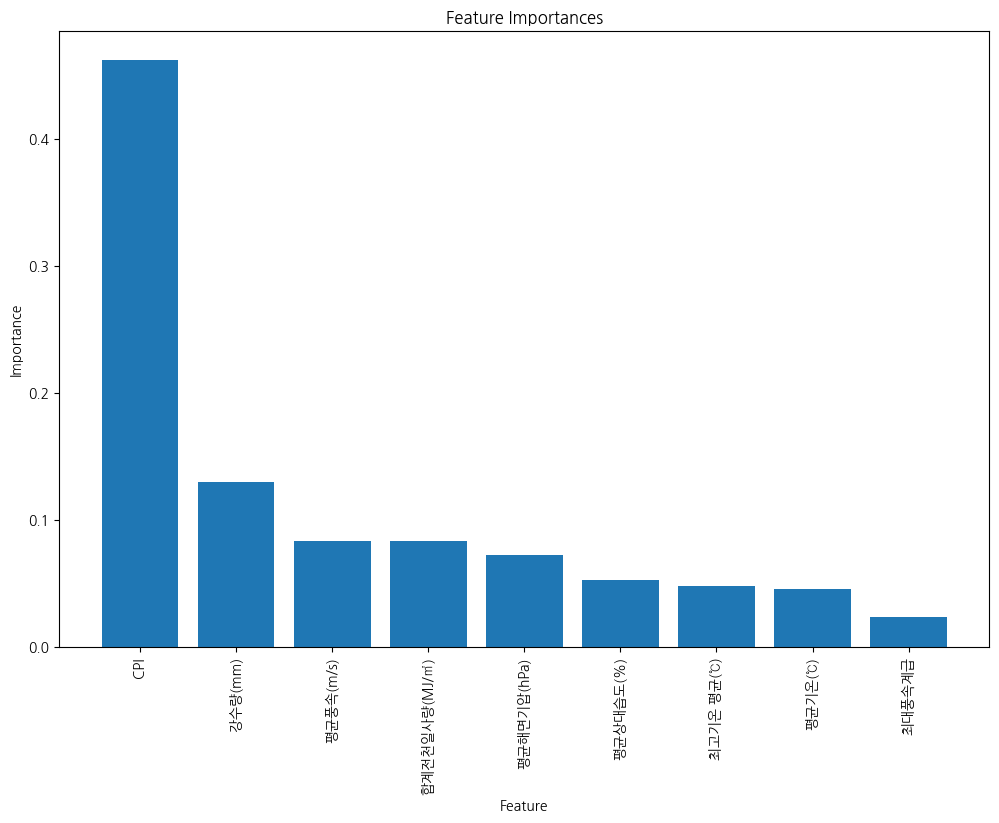

In [33]:
# 특성 중요도 시각화
feature_importances = rf.feature_importances_
features = X.columns
indices = np.argsort(feature_importances)[::-1]

plt.figure(figsize=(12, 8))
plt.title("Feature Importances")
plt.bar(range(X.shape[1]), feature_importances[indices], align='center')
plt.xticks(range(X.shape[1]), [features[i] for i in indices], rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.show()